Importing libraries

In [11]:
import sklearn
import sklearn.datasets
import numpy as np

from skimage.io import imread
from skimage.transform import resize 

from matplotlib import pyplot
import os
from os import listdir 

Load data

In [14]:
X_train = np.zeros((460, 57600))
Y_train = np.zeros((460))
i = 0
for k in range(1, 46):
    left = r"C:/Users/hp/Desktop/MMU-Iris-Database/" + str(k) + "/left"
    right = r"C:/Users/hp/Desktop/MMU-Iris-Database/" + str(k) + "/right"
    for j in os.listdir(left):
        if j.endswith('.bmp'):
            img_array = resize(imread(left + '/' + j), (120, 160, 3)).flatten()
            X_train[i] = img_array
            Y_train[i] = k - 1
            i += 1
    for j in os.listdir(right):
        if j.endswith('.bmp'):
            img_array = resize(imread(right + '/' + j), (120, 160, 3)).flatten()
            X_train[i] = img_array
            Y_train[i] = k - 1
            i += 1


Visualization

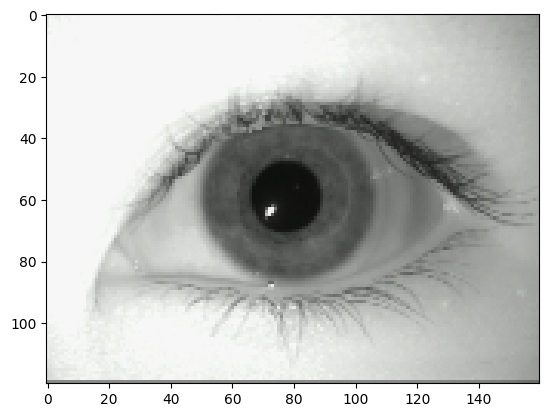

In [19]:
pyplot.imshow(X_train[0].reshape(120, 160, 3))
pyplot.show()

Splitting the database into a training set and a test set using scikit-learn

In [20]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,shuffle=True ,test_size = 0.2, random_state=109, stratify=Y_train)


Support Vector Machine (SVM)

In [21]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold

# Parameters for the neural network
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-4],'C': [1, 10, 100]}]
inner_cv = KFold(n_splits=15, shuffle=False)

# GridSearchCV to find the best parameters
cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 3,cv=inner_cv) 
cv.fit(x_train,y_train)

Fitting 15 folds for each of 3 candidates, totalling 45 fits
[CV 1/15] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.040 total time=  22.0s
[CV 2/15] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.040 total time=  21.3s
[CV 3/15] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.120 total time=  20.7s
[CV 4/15] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.040 total time=  20.4s
[CV 5/15] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.000 total time=  20.8s
[CV 6/15] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.040 total time=  20.6s
[CV 7/15] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.080 total time=  26.0s
[CV 8/15] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.000 total time=  29.7s
[CV 9/15] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.042 total time=  28.3s
[CV 10/15] END ...C=1, gamma=0.0001, kernel=rbf;, score=0.042 total time=  30.4s
[CV 11/15] END ...C=1, gamma=0.0001, kernel=rbf;, score=0.000 total time=  29.0s
[CV 12/15] END ...C=1, gamma=0.0001, kernel=rbf;

GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.0001],
                          'kernel': ['rbf']}],
             verbose=3)

In [24]:
# Display the parameters selected by GridSearchCV
print("The best parameters are", cv.best_params_)
# Build a model with the best parameters
svm = cv.best_estimator_

The best parameters are {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [25]:
#Predictions
y_prediction = svm.predict(x_test)

In [26]:
#Accuracy
from sklearn.metrics import accuracy_score

print("The accuracy:")
print(accuracy_score(y_test, y_prediction)*100, "%")

The accuracy:
78.26086956521739 %
